In [256]:
import time 
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import norm
import matplotlib.pyplot as plt

In [257]:
data_ALV=pd.read_csv('ALV.csv', parse_dates=['DATE'])
data_BAS=pd.read_csv('BAS.csv', parse_dates=['DATE'])
data_BAYN=pd.read_csv('BAYN.csv',parse_dates=['DATE'])
data_BMW=pd.read_csv('BMW.csv',parse_dates=['DATE'])
data_DPW=pd.read_csv('DPW.csv',parse_dates=['DATE'])
data_DTE=pd.read_csv('DTE.csv',parse_dates=['DATE'])
data_LIN=pd.read_csv('LIN.csv',parse_dates=['DATE'])
data_SAP=pd.read_csv('SAP.csv',parse_dates=['DATE'])
data_SIE=pd.read_csv('SIE.csv',parse_dates=['DATE'])

In [258]:
tickers=['ALV', 'BAS', 'BAYN', 'BMW', 'DPW', 'DTE', 'LIN', 'SAP', 'SIE']
companies=[data_ALV,data_BAS,data_BAYN,data_BMW,data_DPW,data_DTE,data_LIN,data_SAP,data_SIE]
years=[2016,2017,2018,2019,2020]
SaleDays = pd.DataFrame()
SaleDays['Тикер'] = tickers

# 1. Торговые дни

In [259]:
for year in years:
    rigth_year_count=0
    list_year=[]
    for com in companies:
        right_year_count=com.query(f'DATE >= "{year}-01-01" & DATE <= "{year}-12-31" ')['DATE'].count()
        list_year.append(right_year_count)
    SaleDays[str(year)] = list_year

In [260]:
SaleDays

,Тикер,2016,2017,2018,2019,2020
0,ALV,255,252,239,249,253
1,BAS,255,252,239,249,253
2,BAYN,255,252,239,249,253
3,BMW,255,252,249,249,253
4,DPW,255,252,241,249,252
5,DTE,255,252,241,249,252
6,LIN,0,0,0,0,90
7,SAP,255,252,241,249,252
8,SIE,255,252,241,249,252


In [261]:
SaleDays.to_csv ('Таблица 2. Количество торговых дней.csv')

In [111]:
#так как мы не сможем исследовать компанию Linde, удалим ее из полученной таблицы

In [262]:
SaleDays_new=SaleDays.drop(index=6)

In [263]:
SaleDays_new


,Тикер,2016,2017,2018,2019,2020
0,ALV,255,252,239,249,253
1,BAS,255,252,239,249,253
2,BAYN,255,252,239,249,253
3,BMW,255,252,249,249,253
4,DPW,255,252,241,249,252
5,DTE,255,252,241,249,252
7,SAP,255,252,241,249,252
8,SIE,255,252,241,249,252


In [264]:
SaleDays_new.to_csv ('Таблица 2. Количество торговых дней_изменённая.csv')

In [265]:
#обновляем переменную companies и tickers, так как не используем больше Linde

In [266]:
tickers=['ALV', 'BAS', 'BAYN', 'BMW', 'DPW', 'DTE', 'SAP', 'SIE']
companies=[data_ALV,data_BAS,data_BAYN,data_BMW,data_DPW,data_DTE,data_SAP,data_SIE]

# 2.1 Максимальные дневные относительные скачки цен вверх (по годам и акциям)


In [267]:
max_up=pd.DataFrame() 
max_up['Ticker'] = tickers

for year in years:
    d_right=[]
    for com in companies:
        com['LEAP']=com['CLOSE'].pct_change().round(4)
        diap=(com['DATE'] >= pd.to_datetime(f'{year}-01-01')) & (com['DATE'] <= pd.to_datetime(f'{year}-12-31 '))
        d_znach=com[diap]['LEAP'].max()
        d_right.append(d_znach)
    max_up[str(year)]=d_right
    
max_up.to_csv ('Таблица 3. Маx дневные относительные скачки цен вверх.csv')     

In [268]:
max_up

,Ticker,2016,2017,2018,2019,2020
0,ALV,0.0437,0.0331,0.0312,0.0339,0.1351
1,BAS,0.0362,0.0388,0.0394,0.0491,0.0956
2,BAYN,0.0516,0.0421,0.0522,0.0905,0.0777
3,BMW,0.0474,0.0299,0.0485,0.0407,0.1254
4,DPW,0.0521,0.0487,0.0431,0.0396,0.1108
5,DTE,0.0427,0.0460,0.0347,0.0277,0.0727
6,SAP,0.0568,0.0295,0.0502,0.1197,0.0804
7,SIE,0.0862,0.0563,0.0653,0.0508,0.0997


# 2.2 Максимальные дневные относительные скачки цен вниз (по годам и акциям)


In [269]:
max_down=pd.DataFrame() 
max_down['Ticker'] = tickers

for year in years:
    d_right=[]
    for com in companies:
        com['LEAP']=com['CLOSE'].pct_change().round(4)
        diap=(com['DATE'] >= pd.to_datetime(f'{year}-01-01')) & (com['DATE'] <= pd.to_datetime(f'{year}-12-31 '))
        d_znach=com[diap]['LEAP'].min()
        d_right.append(d_znach)
    max_down[str(year)]=d_right
            
max_down.to_csv ('Таблица 4. Мax дневные относительные скачки цен вниз.csv')        

In [270]:
max_down

,Ticker,2016,2017,2018,2019,2020
0,ALV,-0.1039,-0.0220,-0.0497,-0.0552,-0.1423
1,BAS,-0.0668,-0.0268,-0.0442,-0.0533,-0.1059
2,BAYN,-0.0820,-0.0410,-0.1070,-0.0993,-0.1215
3,BMW,-0.0753,-0.0320,-0.0560,-0.0523,-0.1208
4,DPW,-0.0701,-0.0384,-0.0706,-0.0374,-0.1144
5,DTE,-0.0519,-0.0322,-0.0512,-0.0470,-0.0928
6,SAP,-0.0563,-0.0346,-0.0608,-0.0537,-0.2237
7,SIE,-0.0741,-0.0373,-0.0494,-0.0412,-0.1131


# 3.1 График цен для акций с максимальным однодневным снижением цены - SAP

In [271]:
data_SAP

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,LEAP
0,SAP,D,2016-01-04,0,71.50,71.76,70.10,70.58,4570793,NaN
1,SAP,D,2016-01-05,0,71.74,71.74,70.17,71.43,2771848,0.0120
2,SAP,D,2016-01-06,0,73.50,73.78,71.24,72.05,3767568,0.0087
3,SAP,D,2016-01-07,0,69.60,71.94,69.50,71.34,4636705,-0.0099
4,SAP,D,2016-01-08,0,71.90,72.48,71.03,71.05,4104441,-0.0041
...,...,...,...,...,...,...,...,...,...,...
1244,SAP,D,2020-12-22,0,101.54,103.98,101.50,103.62,164428,0.0105
1245,SAP,D,2020-12-23,0,103.30,104.16,103.02,103.66,147954,0.0004
1246,SAP,D,2020-12-28,0,104.98,107.00,104.34,106.76,318651,0.0299
1247,SAP,D,2020-12-29,0,107.50,108.00,106.00,106.46,362539,-0.0028


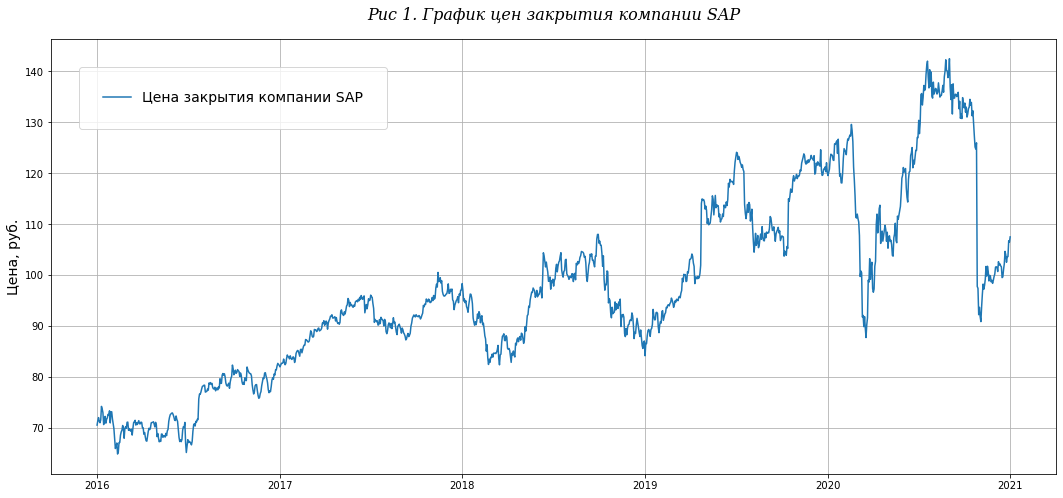

In [272]:
y=data_SAP['CLOSE']
x=np.linspace(2016,2021,len(y))
fig, ax = plt.subplots(figsize=(18, 8)) 
plt.grid(True)
plt.plot(x, y, label='Цена закрытия компании SAP')
plt.legend(borderaxespad=2, fontsize=14, borderpad = 1.7)
plt.ylabel('Цена, руб.', size=14) 
plt.title('Рис 1. График цен закрытия компании SAP', size=16, pad = 19, fontfamily = 'serif', fontstyle = 'italic') 
plt.show()

# 3.2 График цен для акций с максимальным однодневным повышением цены - Allianz

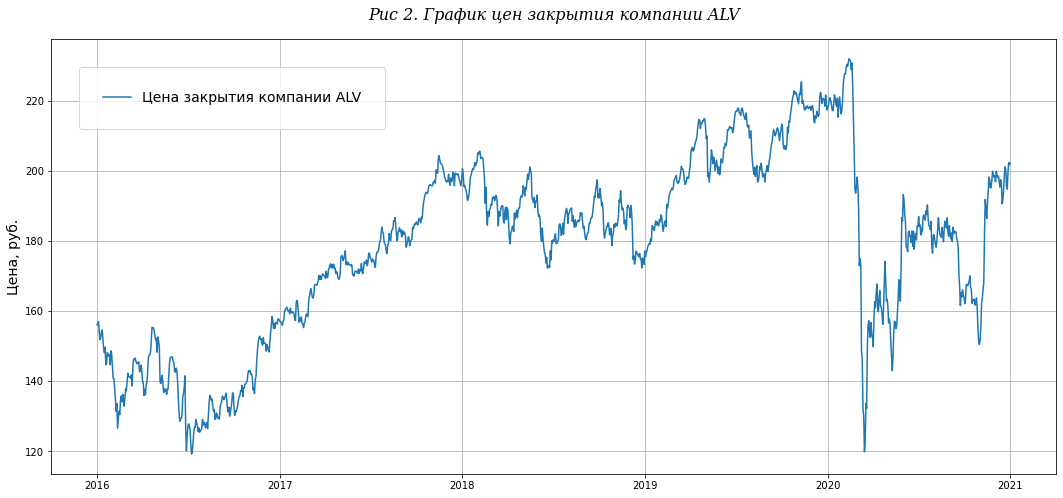

In [273]:
y=data_ALV['CLOSE']
x=np.linspace(2016,2021,len(y))
fig, ax = plt.subplots(figsize=(18, 8)) 
plt.grid(True)
plt.plot(x, y, label='Цена закрытия компании ALV')
plt.legend(borderaxespad=2, fontsize=14, borderpad = 1.7)
plt.ylabel('Цена, руб.', size=14) 
plt.title('Рис 2. График цен закрытия компании ALV', size=16, pad = 19, fontfamily = 'serif', fontstyle = 'italic') 
plt.show()

## давайте удалим все ненужные для дальнейшего анализы столбцы по каждой компании - PER, Time

In [274]:
data_ALV=data_ALV.drop(["PER","TIME"], axis=1)
data_BAS=data_BAS.drop(["PER","TIME"], axis=1)
data_BAYN=data_BAYN.drop(["PER","TIME"], axis=1)
data_BMW=data_BMW.drop(["PER","TIME"], axis=1)
data_DPW=data_DPW.drop(["PER","TIME"], axis=1)
data_DTE=data_DTE.drop(["PER","TIME"], axis=1)
data_SAP=data_SAP.drop(["PER","TIME"], axis=1)
data_SIE=data_SIE.drop(["PER","TIME"], axis=1)

In [275]:
data_SIE

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,LEAP
0,SIE,2016-01-04,88.09,88.09,85.21,85.53,4326103,NaN
1,SIE,2016-01-05,85.50,86.35,85.00,86.07,2649739,0.0063
2,SIE,2016-01-06,85.51,85.78,84.45,85.73,2509210,-0.0040
3,SIE,2016-01-07,83.68,84.61,82.75,84.09,4010217,-0.0191
4,SIE,2016-01-08,84.75,85.66,83.33,83.51,3476413,-0.0069
...,...,...,...,...,...,...,...,...
1244,SIE,2020-12-22,113.68,114.90,113.50,114.34,40812,-0.0054
1245,SIE,2020-12-23,114.28,117.08,114.28,116.74,59747,0.0210
1246,SIE,2020-12-28,117.20,119.30,117.20,119.00,106596,0.0194
1247,SIE,2020-12-29,119.10,119.74,116.64,116.78,89969,-0.0187


# Раздел 4. Проверка гипотезы на модельных данных

In [295]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.ticker as ticker
from scipy.special import *


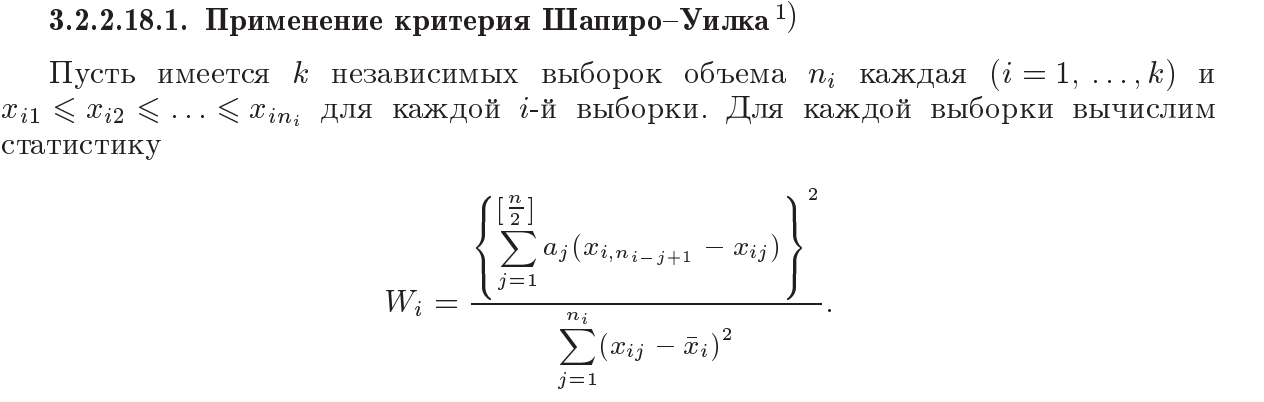

In [286]:
import time
sample=[-1,0,1,2,3,5,6,7,10,15]
start_time = time.time()
def stat_shapiro_mine(sample):
    koef_n10=[5739/10**4,3291/10**4,2141/10**4,1224/10**4,399/10**4]
    denominator=0
    numerator=0
    n=len(sample)
    sample=sorted(sample)
    sample_mean=np.mean(sample)
    for j in range(1,n//2+1):
        numerator+=((sample[n-j-1+1]-sample[j-1])*koef_n10[j-1])
    for j in range(n):
        denominator+=(sample[j]-sample_mean)**2
    w=numerator**2/denominator
    return w
W=stat_shapiro_mine(sample)
finish_time = time.time()
start_time1 = time.time()
W1=stats.shapiro(sample)[0]
finish_time1 = time.time()
print('Результат W моей функции=',np.round(W,5))
print('Результат W встроенной функции=', np.round(W1,5))
print("--- %s seconds in my function ---" % (finish_time - start_time))
print("--- %s seconds ---in stats.shapiro" % (finish_time1 - start_time1))
#sample=stats.norm.rvs(loc=0, scale=1, size=n) - если выше захотим проверить на другой выборке

Результат W моей функции= 0.93476
Результат W встроенной функции= 0.93466
--- 0.001003265380859375 seconds in my function ---
--- 0.0 seconds ---in stats.shapiro


### 1) строим гистограмму р-значений по Шапиро-Уилка с помощью метода Монте-Карло

#### для начала рассчитаем статистику каждой выборки и значения квантилей

In [134]:
N=10**5 #количество испытаний
n=249 #объем каждой из выборок, соотвт. среднему количеству торговых дней за год
list_for_q9=np.arange(0.1,1,0.1) #будущие 9 квантилей
list_for_q999=np.arange(0.001,1,0.001) #будущие 999 квантилей
list_q9=[] #здесь будут записаны значения 9 квантилей
list_q999=[] #здесь будут записаны значения 999 квантилей 
stat_shapiro=[] #список статистик каждой из N выборок
stat_shapiro_p=[]
KS_p=[]
for i in range(N):
    data_norm=stats.norm.rvs(loc=0, scale=1, size=n) #генерируем выборку из нормального распределения
    stat_shapiro.append(stats.shapiro(data_norm)[0]) #находим значение статистики критерия
    stat_shapiro_p.append(stats.shapiro(data_norm)[1]) #через встроенную функцию находим р-значения
    KS_p.append(stats.kstest(data_norm,'norm')[1])


list_q9=np.quantile(stat_shapiro,list_for_q9) #заполняем значения 9 квантилей
list_q999=np.quantile(stat_shapiro,list_for_q999)  #заполняем значения 999 квантилей

#создадим таблицу 9 и 999 квантилей

q9= pd.DataFrame({'Квантиль':list_for_q9, 'Значение':list_q9})
q999= pd.DataFrame({'Квантиль':list_for_q999, 'Значение':list_q999})

#сохраним таблицы в csv

In [161]:
q9.to_csv ('Таблица 9 квантилей и их значений') 
q999.to_csv ('Таблица 999 квантилей и их значений')     

In [162]:
q9

,Квантиль,Значение
0,0.1,0.990446
1,0.2,0.992083
2,0.3,0.993094
3,0.4,0.993837
4,0.5,0.994464
5,0.6,0.995029
6,0.7,0.995554
7,0.8,0.996100
8,0.9,0.996743


In [136]:
q999

,Квантиль,Значение
0,0.001,0.979107
1,0.002,0.980682
2,0.003,0.981564
3,0.004,0.982257
4,0.005,0.982897
...,...,...
994,0.995,0.998077
995,0.996,0.998139
996,0.997,0.998204
997,0.998,0.998286


#### теперь перейдём к вычислению 1000 р-значений выборок аналитически

In [137]:
p_znach_shapiro=[stats.percentileofscore(list_q999,stat_shapiro[i])/100 for i in range(1000)]

In [288]:
U=stats.uniform()
u = np.linspace(-1, 2, 1000)
y=U.pdf(u)

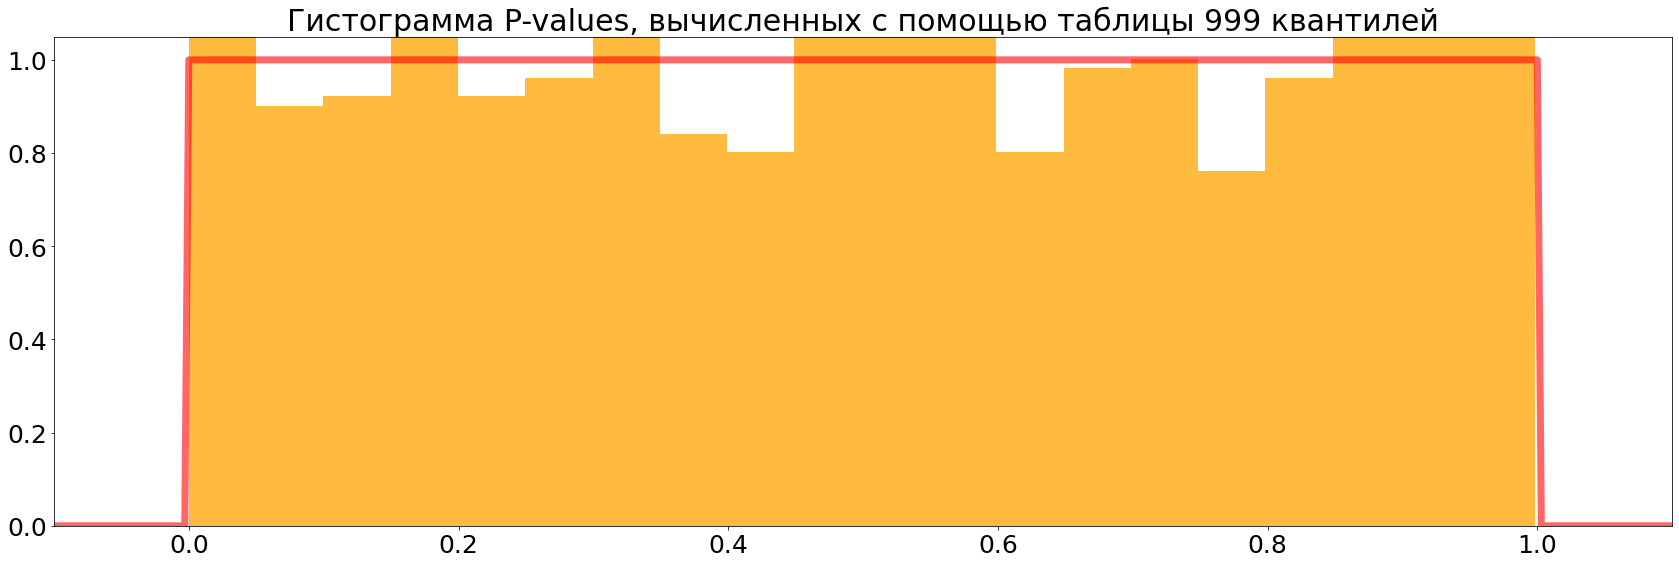

In [145]:
fig,ax =plt.subplots(figsize=(29, 9))
plt.xlim(-0.1,1.1)
plt.ylim(0.0,1.05)
plt.tick_params(labelsize = 25)
plt.plot(u, y, 'r-', lw=7, alpha=0.6)
plt.hist(p_znach_shapiro, density=True,bins=20,alpha=0.75, color='orange')
plt.title('Гистограмма P-values, вычисленных c помощью таблицы 999 квантилей', fontsize=30)
plt.show()

In [146]:
pvalue111 = stats.kstest(p_znach_shapiro,'uniform')

In [147]:
pvalue111

KstestResult(statistic=0.023944944944944944, pvalue=0.6063268920229192)

### 2) строим гистограмму р-значений по Шапиро-Уилка, полученных из встроенной функции на ЭТИХ же данных

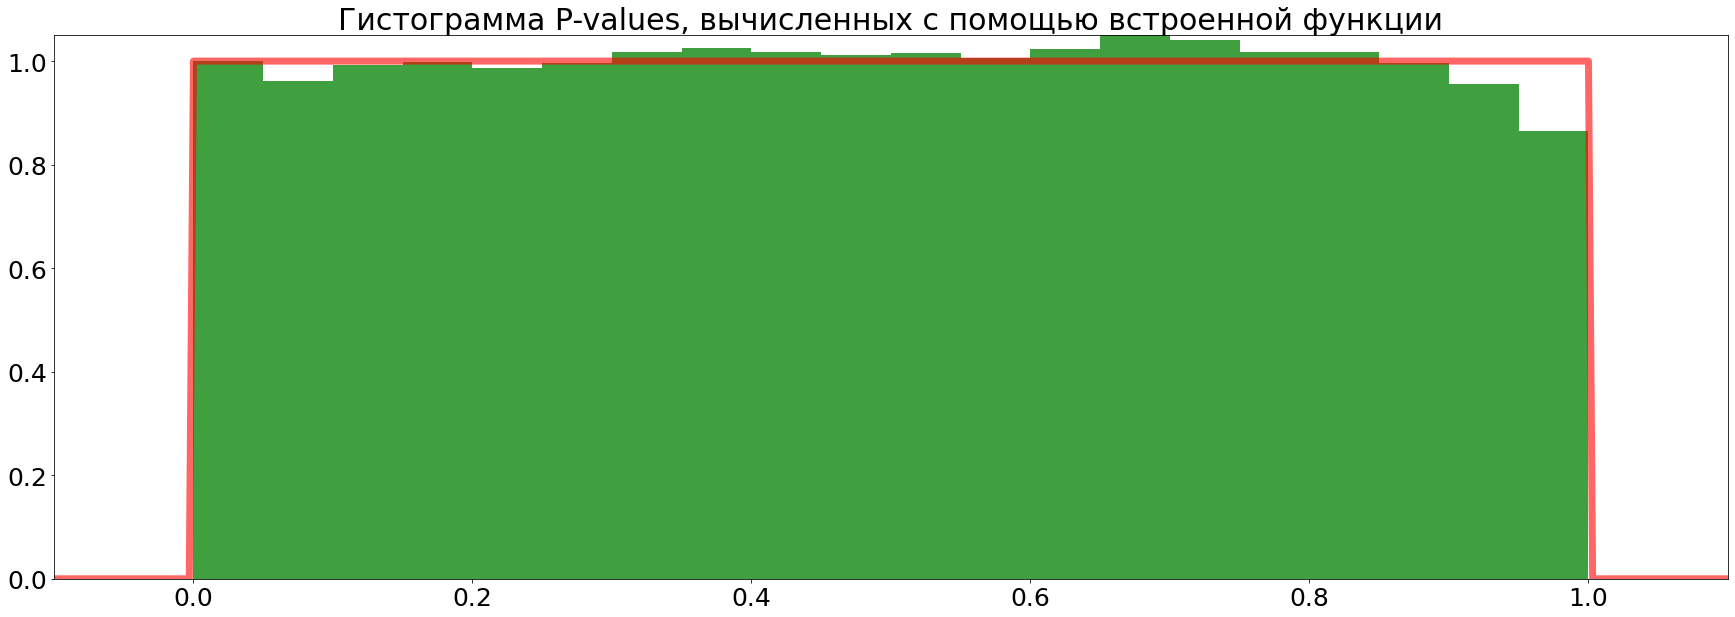

In [149]:
fig,ax =plt.subplots(figsize=(30, 10))
plt.xlim(-0.1,1.1)
plt.ylim(0.0,1.05)
plt.tick_params(labelsize = 25)
plt.plot(u, y, 'r-', lw=7, alpha=0.6)
plt.hist(stat_shapiro_p,density=True,bins=20,alpha=0.75, color='green')
plt.title('Гистограмма P-values, вычисленных c помощью встроенной функции',fontsize=30)
plt.show()

### 3) строим гистограмму р-значений по критерию Колмогорова

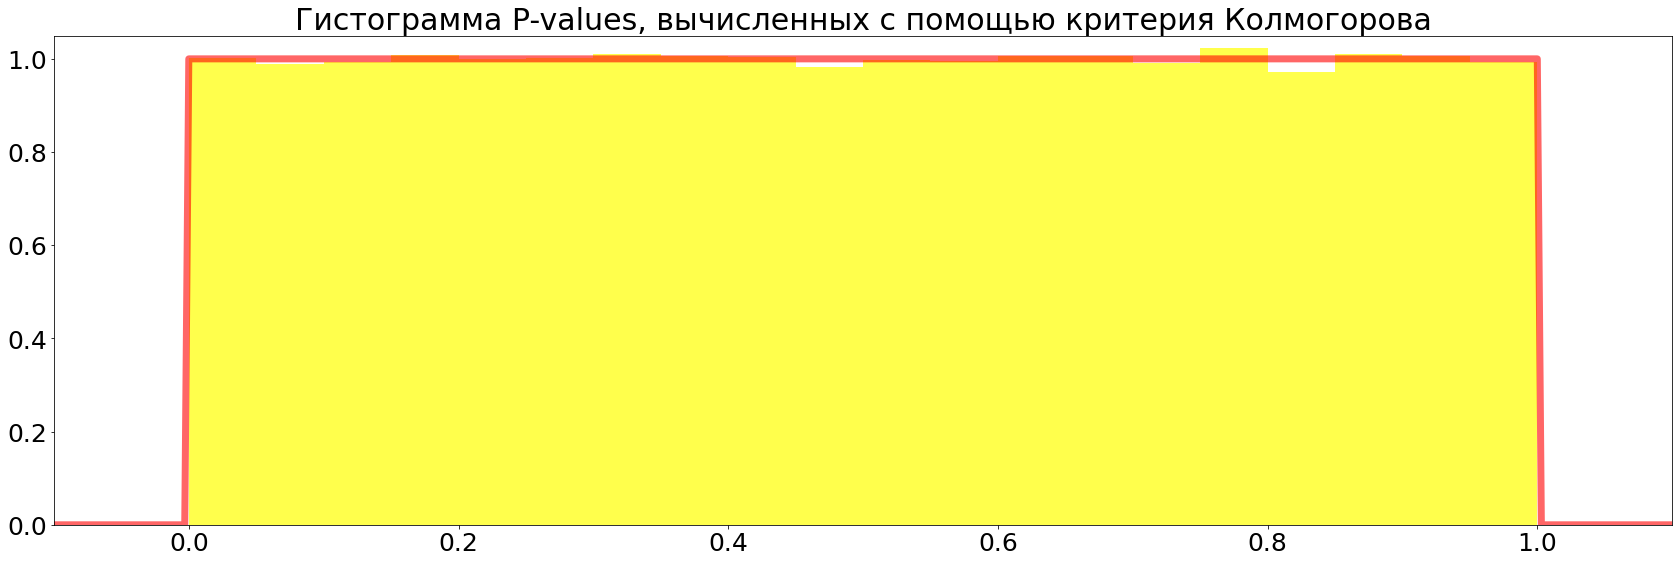

In [153]:
fig,ax =plt.subplots(figsize=(29, 9))
plt.tick_params(labelsize = 25)
plt.xlim(-0.1,1.1)
plt.ylim(0.0,1.05)
plt.plot(u, y, 'r-', lw=7, alpha=0.6)
plt.hist(KS_p,bins=20,alpha=0.7, density=True, color='yellow')
plt.title('Гистограмма P-values, вычисленных c помощью критерия Колмогорова',fontsize=30)
plt.show()

In [154]:
#проверка, что распределения p-значений идентичны
pvalueend= stats.ks_2samp(p_znach_shapiro,KS_p)

In [84]:
pvalueend

KstestResult(statistic=0.02457000000000001, pvalue=0.579806403842505)

# Раздел 5. Выбор альтернативной гипотезы и оценка мощности критерия

In [ ]:
#распределение T (Стьюдента), распределение Лапласа и Х2 распределение.

In [303]:
#### n=250
alpha=0.5
stat_shapiro_p_chi=[]
stat_shapiro_p_laplace=[]
stat_shapiro_p_t=[]

n=250
for i in range(1000):
    data_chi=stats.chi2.rvs(df=2,loc=0, scale=1, size=n)
    data_lap=stats.laplace.rvs(loc=0, scale=1, size=n)
    data_t=stats.t.rvs(df=2,loc=0, scale=1, size=n)
    stat_shapiro_p_chi.append(stats.shapiro(data_chi)[1])
    stat_shapiro_p_laplace.append(stats.shapiro(data_lap)[1])
    stat_shapiro_p_t.append(stats.shapiro(data_t)[1])

pow_chi_250=0
pow_t_250=0
pow_lap_250=0
    
for i in stat_shapiro_p_chi:
    if i>alpha:
        pow_chi_250+=1

for i in stat_shapiro_p_laplace:
    if i>alpha:
        pow_lap_250+=1
        
for i in stat_shapiro_p_t:
    if i>alpha:
        pow_t_250+=1
        
pow_250=[pow_chi_250/1000,pow_t_250/1000,pow_lap_250/1000 ]

#######n=125
stat_shapiro_p_chi=[]
stat_shapiro_p_laplace=[]
stat_shapiro_p_t=[]
n=125
for i in range(1000):
    data_chi=stats.chi2.rvs(df=2,loc=0, scale=1, size=n)
    data_lap=stats.laplace.rvs(loc=0, scale=1, size=n)
    data_t=stats.t.rvs(df=2,loc=0, scale=1, size=n)
    stat_shapiro_p_chi.append(stats.shapiro(data_chi)[1])
    stat_shapiro_p_laplace.append(stats.shapiro(data_lap)[1])
    stat_shapiro_p_t.append(stats.shapiro(data_t)[1])

pow_chi_125=0
pow_t_125=0
pow_lap_125=0
    
for i in stat_shapiro_p_chi:
    if i>alpha:
        pow_chi_125+=1

for i in stat_shapiro_p_laplace:
    if i>alpha:
        pow_lap_125+=1
        
for i in stat_shapiro_p_t:
    if i>alpha:
        pow_t_125+=1

pow_125=[pow_chi_125/1000,pow_t_125/1000,pow_lap_125/1000 ]  

#######n=30
stat_shapiro_p_chi=[]
stat_shapiro_p_laplace=[]
stat_shapiro_p_t=[]
n=30
for i in range(1000):
    data_chi=stats.chi2.rvs(df=2,loc=0, scale=1, size=n)
    data_lap=stats.laplace.rvs(loc=0, scale=1, size=n)
    data_t=stats.t.rvs(df=2,loc=0, scale=1, size=n)
    stat_shapiro_p_chi.append(stats.shapiro(data_chi)[1])
    stat_shapiro_p_laplace.append(stats.shapiro(data_lap)[1])
    stat_shapiro_p_t.append(stats.shapiro(data_t)[1])

pow_chi_30=0
pow_t_30=0
pow_lap_30=0
    
for i in stat_shapiro_p_chi:
    if i>alpha:
        pow_chi_30+=1

for i in stat_shapiro_p_laplace:
    if i>alpha:
        pow_lap_30+=1
        
for i in stat_shapiro_p_t:
    if i>alpha:
        pow_t_30+=1

pow_30=[pow_chi_30/1000,pow_t_30/1000,pow_lap_30/1000 ]  

list_raspr=['Хи-квадрат','Стьюдент','Лапласа']
power= pd.DataFrame({'Распределение':list_raspr, 'Мощность при n=250':pow_250,'Мощность при n=125':pow_125, 'Мощность при n=30':pow_30 })

In [304]:
power

,Распределение,Мощность при n=250,Мощность при n=125,Мощность при n=30
0,Хи-квадрат,0.0,0.000,0.000
1,Стьюдент,0.0,0.000,0.103
2,Лапласа,0.0,0.014,0.217


# Раздел 6. Реальные данные

In [203]:
#найдем логарифмические доходности на каждый день по всем компаниям

In [279]:
tickers=['ALV', 'BAS', 'BAYN', 'BMW', 'DPW', 'DTE', 'SAP', 'SIE']
companies=[data_ALV,data_BAS,data_BAYN,data_BMW,data_DPW,data_DTE,data_SAP,data_SIE]
def log_kek(com): #функция для подсчета дневной логарифмической доходности
    log_com=[np.round(np.log(com['CLOSE'][i+1]/com['CLOSE'][i]),4) for i in range(len(com)-1)]
    log_com.insert(0,0)
    return log_com
data_ALV['LOG LEAP']=log_kek(data_ALV)
data_BAS['LOG LEAP']=log_kek(data_BAS)
data_BAYN['LOG LEAP']=log_kek(data_BAYN)
data_BMW['LOG LEAP']=log_kek(data_BMW)
data_DPW['LOG LEAP']=log_kek(data_DPW)
data_DTE['LOG LEAP']=log_kek(data_DTE)
data_SAP['LOG LEAP']=log_kek(data_SAP)
data_SIE['LOG LEAP']=log_kek(data_SIE)

In [ ]:
#ПРОМЕЖУТОК ГОД

In [158]:
years=[2016,2017,2018,2019,2020]
p_real=pd.DataFrame(index=tickers)
p_okrugl=pd.DataFrame(index=tickers)
p_all=[]
for year in years:
    p_per_all=[]
    p_per_all_okrug=[]
    for com in companies:
        diap=(com['DATE'] >= pd.to_datetime(f'{year}-01-01')) & (com['DATE'] <= pd.to_datetime(f'{year}-12-31 '))
        p_znach=stats.shapiro(com[diap]['LOG LEAP'])[1]
        p_znach_okrug=np.round(stats.shapiro(com[diap]['LOG LEAP'])[1],5)
        p_per_all.append(p_znach)
        p_per_all_okrug.append(p_znach_okrug)
        p_all.append(p_znach)
    p_real[str(year)]=p_per_all
    p_okrugl[str(year)]=p_per_all_okrug

k1,k5=0,0    
for i in range(len(p_all)):
    if p_all[i]>=0.01:
        k1+=1
    if p_all[i]>=0.05:
        k5+=1
        
print(f"Гипотеза принимается лишь в {k1/len(p_all):.0%} при 1% уровне значимости") 
print(f"Гипотеза принимается лишь в {k5/len(p_all):.0%} при 5% уровне значимости") 

Гипотеза принимается лишь в 8% при 1% уровне значимости
Гипотеза принимается лишь в 2% при 5% уровне значимости


In [96]:
p_real

,2016,2017,2018,2019,2020
ALV,1.583984e-10,3.304577e-04,2.662125e-04,2.397460e-09,3.231395e-13
BAS,2.730699e-04,9.677988e-03,6.156262e-01,2.922494e-04,3.428819e-07
BAYN,1.150762e-07,6.951123e-04,2.892991e-10,2.498536e-08,6.687219e-08
BMW,3.061720e-02,2.708930e-04,2.758724e-04,2.806764e-04,1.054436e-10
DPW,1.570336e-07,2.127672e-06,2.697140e-07,1.701912e-02,1.658740e-11
DTE,3.493496e-04,1.985800e-06,5.050438e-03,3.852072e-08,5.650786e-09
SAP,1.736952e-05,9.640772e-04,2.535483e-04,1.381971e-15,6.952844e-19
SIE,6.639803e-08,3.570996e-08,1.958802e-05,1.486460e-04,1.188475e-08


In [97]:
p_okrugl

,2016,2017,2018,2019,2020
ALV,0.00000,0.00033,0.00027,0.00000,0.0
BAS,0.00027,0.00968,0.61563,0.00029,0.0
BAYN,0.00000,0.00070,0.00000,0.00000,0.0
BMW,0.03062,0.00027,0.00028,0.00028,0.0
DPW,0.00000,0.00000,0.00000,0.01702,0.0
DTE,0.00035,0.00000,0.00505,0.00000,0.0
SAP,0.00002,0.00096,0.00025,0.00000,0.0
SIE,0.00000,0.00000,0.00002,0.00015,0.0


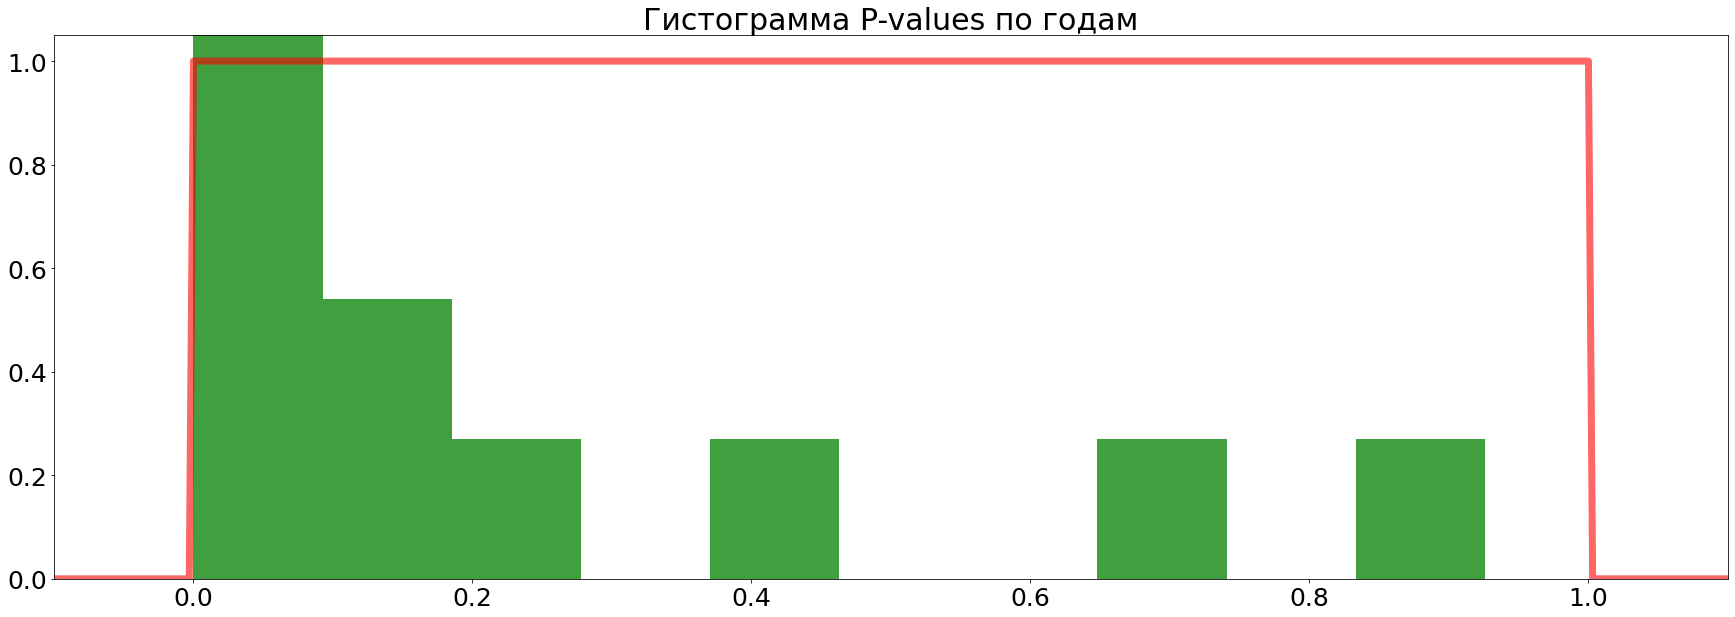

In [112]:
#построим гистограмму всех р-значений
fig,ax =plt.subplots(figsize=(30, 10))
plt.tick_params(labelsize = 25)
plt.xlim(-0.1,1.1)
plt.ylim(0.0,1.05)
plt.plot(u, y, 'r-', lw=7, alpha=0.6)
plt.hist(p_all,alpha=0.75, density=True, color='green')
plt.title('Гистограмма P-values по годам',fontsize=30)
plt.show()

In [122]:
pv = stats.kstest(p_all,'uniform')
pv[1]

4.7793625063075226e-09

In [ ]:
# ПРОМЕЖУТОК ПОЛГОДА

Гипотеза принимается лишь в 35% при 1% уровне значимости
Гипотеза принимается лишь в 20% при 5% уровне значимости


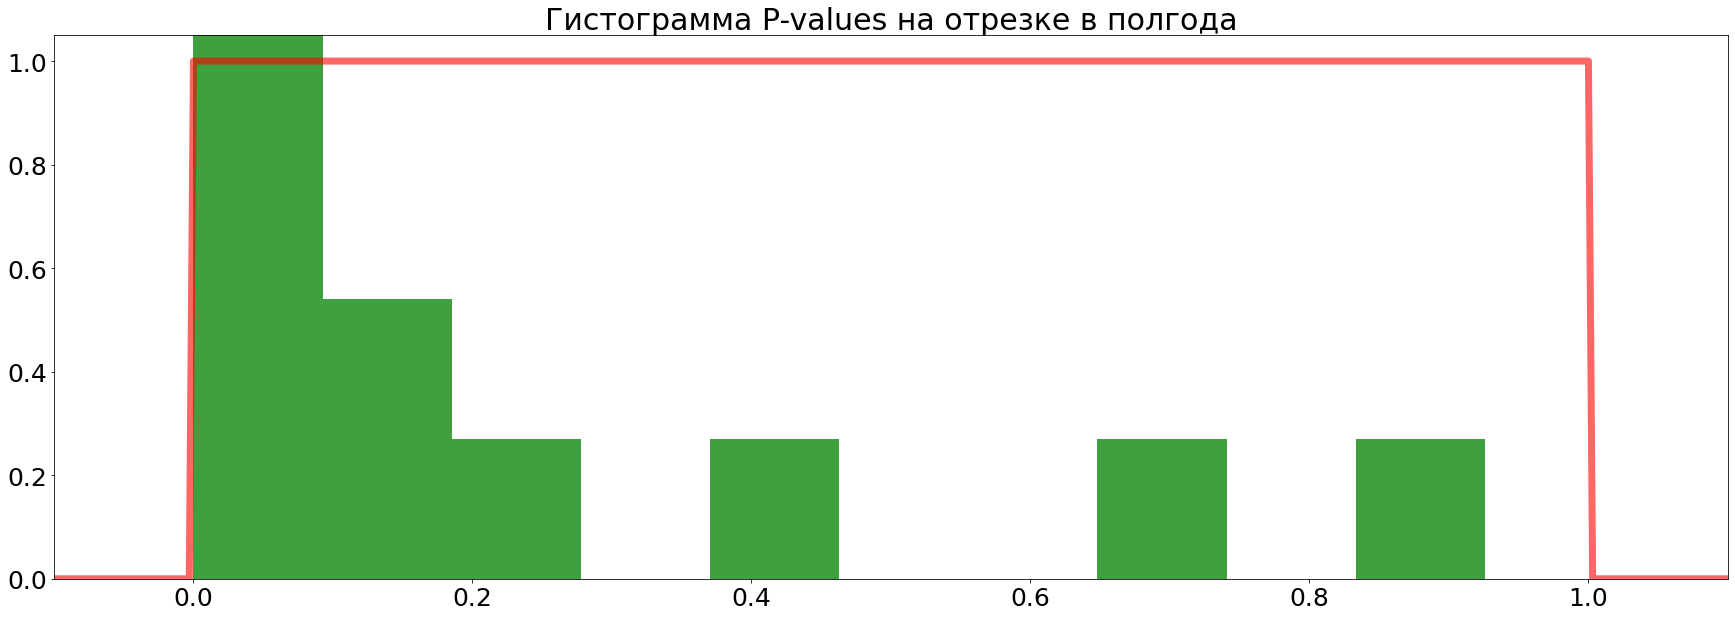

значение проверки на равномерность 3.769667186512969e-26


In [159]:
years=[2016,2017,2018,2019,2020]
p_real=pd.DataFrame(index=tickers)
p_okrugl=pd.DataFrame(index=tickers)
p_all=[]
for year in years:
    p_per_all=[]
    p_per_all_okrug=[]
    for com in companies:
        diap=(com['DATE'] >= pd.to_datetime(f'{year}-01-01')) & (com['DATE'] <= pd.to_datetime(f'{year}-06-30 '))
        p_znach=stats.shapiro(com[diap]['LOG LEAP'])[1]
        p_znach_okrug=np.round(stats.shapiro(com[diap]['LOG LEAP'])[1],5)
        p_per_all.append(p_znach)
        p_per_all_okrug.append(p_znach_okrug)
        p_all.append(p_znach)
    p_real[str(year)]=p_per_all
    p_okrugl[str(year)]=p_per_all_okrug

k1,k5=0,0    
for i in range(len(p_all)):
    if p_all[i]>=0.01:
        k1+=1
    if p_all[i]>=0.05:
        k5+=1
        
print(f"Гипотеза принимается лишь в {k1/len(p_all):.0%} при 1% уровне значимости") 
print(f"Гипотеза принимается лишь в {k5/len(p_all):.0%} при 5% уровне значимости") 

#построим гистограмму р-значений промежутка в полгода
fig,ax =plt.subplots(figsize=(30, 10))
plt.tick_params(labelsize = 25)
plt.xlim(-0.1,1.1)
plt.ylim(0.0,1.05)
plt.plot(u, y, 'r-', lw=7, alpha=0.6)
plt.hist(p_all,density=True,alpha=0.75, color='green')
plt.title('Гистограмма P-values на отрезке в полгода',fontsize=30)
plt.show()
pv = stats.kstest(p_all,'uniform')
print('значение проверки на равномерность',pv[1])

In [103]:
p_okrugl

,2016,2017,2018,2019,2020
ALV,0.00000,0.00016,0.02771,0.00000,0.00000
BAS,0.03920,0.00447,0.92571,0.00102,0.00663
BAYN,0.00006,0.00078,0.03656,0.00001,0.00051
BMW,0.46173,0.16264,0.06438,0.00076,0.00001
DPW,0.02243,0.00003,0.00000,0.68933,0.00008
DTE,0.20697,0.00000,0.07121,0.00000,0.00077
SAP,0.01159,0.00006,0.11121,0.00000,0.00012
SIE,0.00002,0.00000,0.00158,0.04118,0.00077


In [ ]:
# ПРОМЕЖУТОК ОДИН КВАРТАЛ (3 МЕСЯЦА)

Гипотеза принимается лишь в 60% при 1% уровне значимости
Гипотеза принимается лишь в 55% при 5% уровне значимости


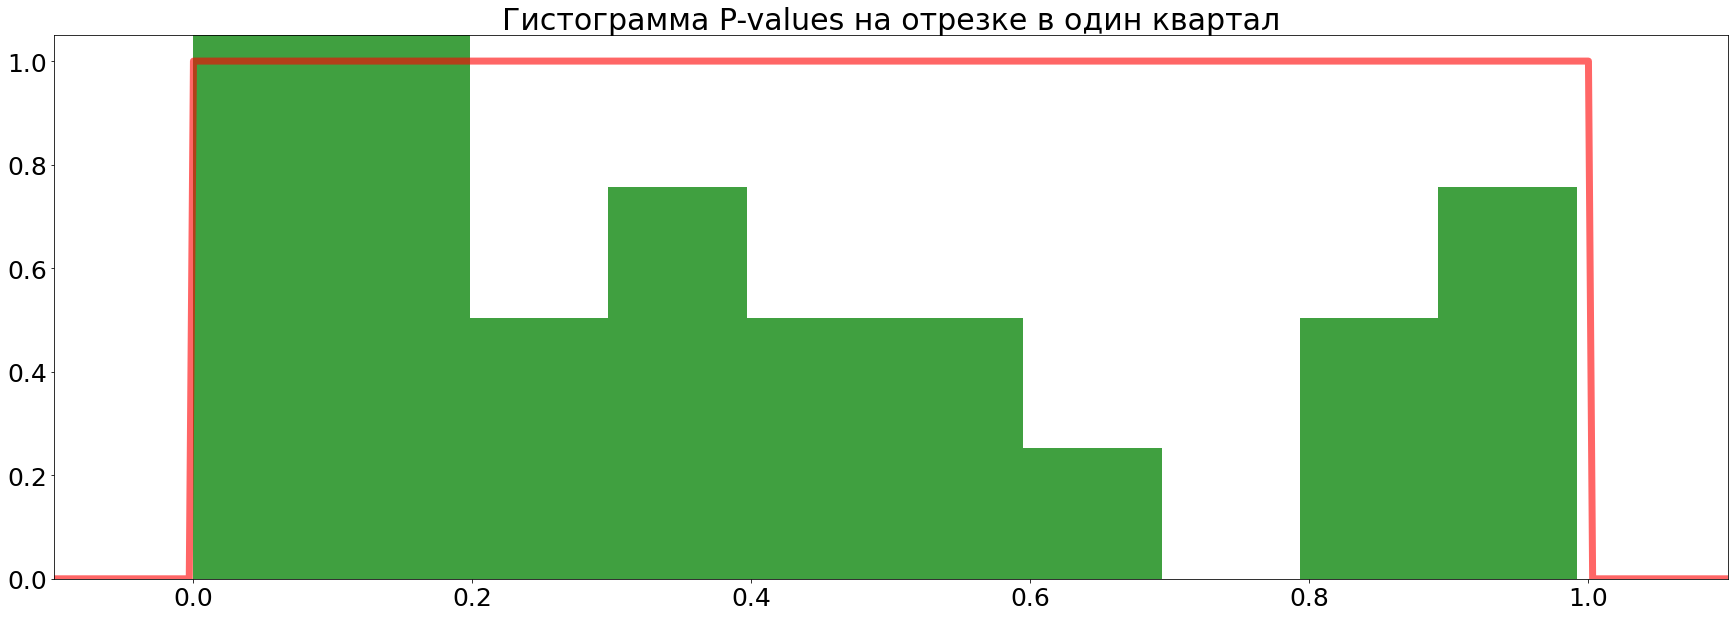

значение проверки на равномерность 4.7793625063075226e-09


In [289]:
years=[2016,2017,2018,2019,2020]
p_real=pd.DataFrame(index=tickers)
p_okrugl=pd.DataFrame(index=tickers)
p_all=[]
for year in years:
    p_per_all=[]
    p_per_all_okrug=[]
    for com in companies:
        diap=(com['DATE'] >= pd.to_datetime(f'{year}-01-01')) & (com['DATE'] <= pd.to_datetime(f'{year}-03-30 '))
        p_znach=stats.shapiro(com[diap]['LOG LEAP'])[1]
        p_znach_okrug=np.round(stats.shapiro(com[diap]['LOG LEAP'])[1],5)
        p_per_all.append(p_znach)
        p_per_all_okrug.append(p_znach_okrug)
        p_all.append(p_znach)
    p_real[str(year)]=p_per_all
    p_okrugl[str(year)]=p_per_all_okrug

k1,k5=0,0    
for i in range(len(p_all)):
    if p_all[i]>=0.01:
        k1+=1
    if p_all[i]>=0.05:
        k5+=1
        
print(f"Гипотеза принимается лишь в {k1/len(p_all):.0%} при 1% уровне значимости") 
print(f"Гипотеза принимается лишь в {k5/len(p_all):.0%} при 5% уровне значимости") 

#построим гистограмму р-значений промежутка в полгода
fig,ax =plt.subplots(figsize=(30, 10))
plt.tick_params(labelsize = 25)
plt.xlim(-0.1,1.1)
plt.ylim(0.0,1.05)
plt.plot(u, y, 'r-', lw=7, alpha=0.6)
plt.hist(p_all,density=True,alpha=0.75, color='green')
plt.title('Гистограмма P-values на отрезке в один квартал',fontsize=30)
plt.show()
pv = stats.kstest(p_all,'uniform')
print('значение проверки на равномерность',pv[1])

In [290]:
p_okrugl

,2016,2017,2018,2019,2020
ALV,0.63161,0.00570,0.00832,0.00064,0.00000
BAS,0.58922,0.31570,0.54158,0.00038,0.00001
BAYN,0.14370,0.38698,0.26983,0.00008,0.00027
BMW,0.12009,0.49366,0.40503,0.10166,0.00000
DPW,0.80293,0.97103,0.12681,0.89547,0.00044
DTE,0.28332,0.01205,0.99146,0.00004,0.00201
SAP,0.14120,0.84513,0.35158,0.11130,0.00110
SIE,0.00118,0.00022,0.07087,0.04621,0.00001


In [291]:
p_okrugl.to_csv('p-values за квартал')

In [ ]:
# ПРОМЕЖУТОК 1 МЕСЯЦ

Гипотеза принимается в 92% при 1% уровне значимости
Гипотеза принимается в 88% при 5% уровне значимости


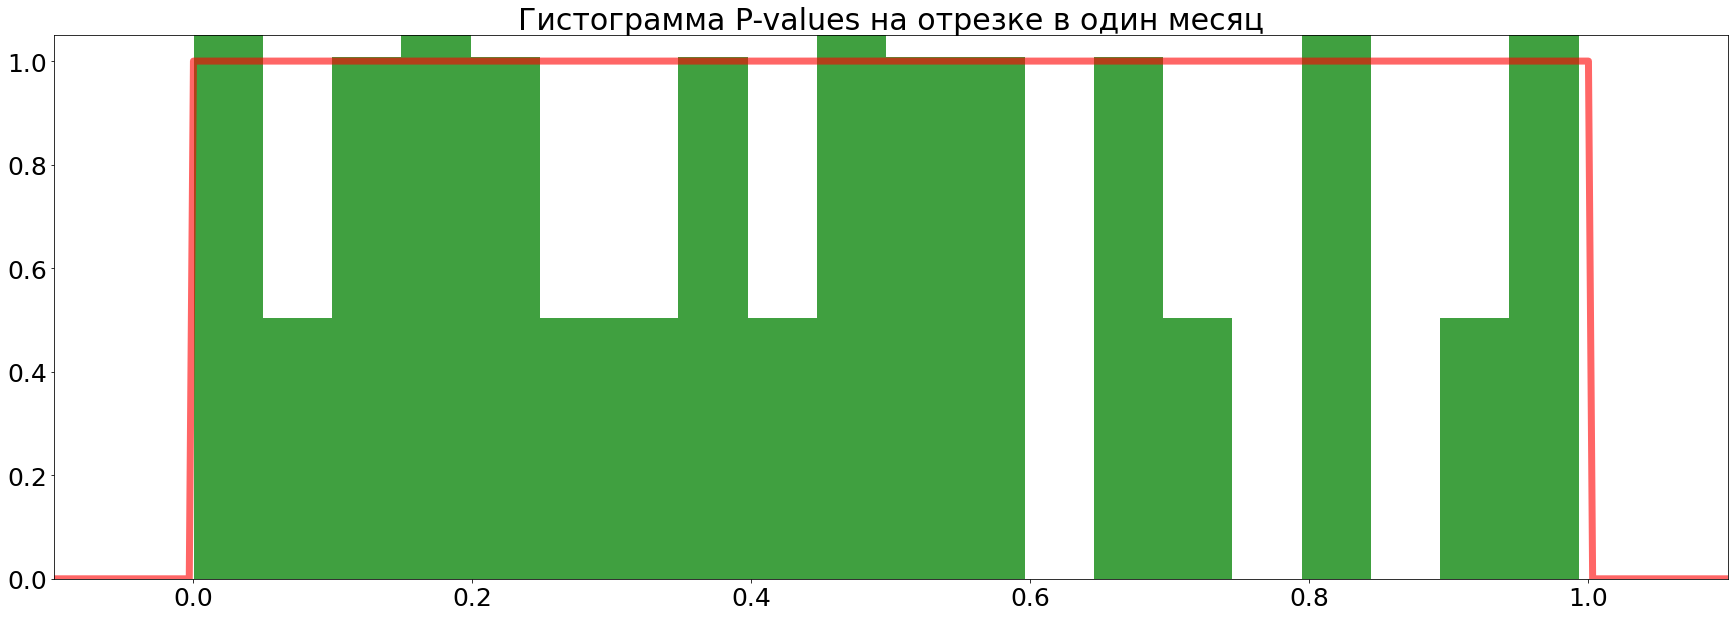

значение проверки на равномерность 0.28018


In [292]:
years=[2016,2017,2018,2019,2020]
p_real=pd.DataFrame(index=tickers)
p_okrugl=pd.DataFrame(index=tickers)
p_all=[]
for year in years:
    p_per_all=[]
    p_per_all_okrug=[]
    for com in companies:
        diap=(com['DATE'] >= pd.to_datetime(f'{year}-03-01')) & (com['DATE'] <= pd.to_datetime(f'{year}-03-30 '))
        p_znach=stats.shapiro(com[diap]['LOG LEAP'])[1]
        p_znach_okrug=np.round(stats.shapiro(com[diap]['LOG LEAP'])[1],5)
        p_per_all.append(p_znach)
        p_per_all_okrug.append(p_znach_okrug)
        p_all.append(p_znach)
    p_real[str(year)]=p_per_all
    p_okrugl[str(year)]=p_per_all_okrug

k1,k5=0,0    
for i in range(len(p_all)):
    if p_all[i]>=0.01:
        k1+=1
    if p_all[i]>=0.05:
        k5+=1
        
print(f"Гипотеза принимается в {k1/len(p_all):.0%} при 1% уровне значимости") 
print(f"Гипотеза принимается в {k5/len(p_all):.0%} при 5% уровне значимости") 

#построим гистограмму р-значений промежутка в полгода
fig,ax =plt.subplots(figsize=(30, 10))
plt.tick_params(labelsize = 25)
plt.xlim(-0.1,1.1)
plt.ylim(0.0,1.05)
plt.plot(u, y, 'r-', lw=7, alpha=0.6)
plt.hist(p_all,bins=20,alpha=0.75, density=True, color='green')
plt.title('Гистограмма P-values на отрезке в один месяц',fontsize=30)
plt.show()
pv = stats.kstest(p_all,'uniform')
print('значение проверки на равномерность',np.round(pv[1],5))

In [293]:
p_okrugl

,2016,2017,2018,2019,2020
ALV,0.05014,0.84382,0.14729,0.93683,0.15385
BAS,0.44318,0.15685,0.47627,0.52246,0.33255
BAYN,0.99148,0.37145,0.14963,0.00168,0.57819
BMW,0.79613,0.39255,0.22171,0.23044,0.03613
DPW,0.12440,0.97144,0.65925,0.03588,0.71256
DTE,0.50307,0.56302,0.27058,0.00005,0.99288
SAP,0.48781,0.64899,0.81732,0.82715,0.48789
SIE,0.46452,0.48733,0.18221,0.00228,0.48151


In [294]:
p_okrugl.to_csv('p-values за месяц')